<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/2_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сверточные нейронные сети (CNN)

#Подробный обзор Forward Pass

Сверточные нейронные сети (CNN, Convolutional Neural Networks) являются мощными инструментами для анализа изображений и других данных с пространственной структурой. В этом разделе мы подробно рассмотрим этап прямого прохода (Forward Pass) в CNN, включая математические операции и архитектуру, используемую в этих сетях.


### 1. Основные компоненты CNN

Сверточные нейронные сети состоят из нескольких типов слоев:

1. **Сверточные слои (Convolutional Layers)**: Эти слои применяют свертку к входным данным, используя фильтры (или ядра).
2. **Активационные функции (Activation Functions)**: После свертки часто применяются нелинейные функции, такие как ReLU, сигмоида или гиперболический тангенс.
3. **Пулинговые слои (Pooling Layers)**: Эти слои уменьшают размерность входных данных, сохраняя основные признаки.
4. **Полносвязные слои (Fully Connected Layers)**: В этих слоях выходы предыдущих слоев используются для получения окончательного предсказания.

### 2. Архитектура CNN

Стандартная архитектура CNN может выглядеть следующим образом:

- Входные данные (например, изображение)
- Сверточный слой
- Активационный слой (например, ReLU)
- Пулинговый слой (например, Max Pooling)
- Повторение этих слоев несколько раз
- Полносвязный слой
- Выходной слой (например, Softmax для классификации)

### 3. Forward Pass: Подробный процесс

Рассмотрим процесс прямого прохода (Forward Pass) по каждому из слоев CNN.

#### 3.1. Входные данные

Предположим, что у нас есть входное изображение, представляемое в виде трехмерного тензора:

$$
X \in \mathbb{R}^{H \times W \times C}
$$

где:
- $H$ — высота изображения,
- $W$ — ширина изображения,
- $C$ — количество каналов (например, 3 для цветного изображения RGB).

#### 3.2. Сверточный слой

На этом этапе мы применяем свертку к входным данным с использованием фильтров (или ядер). Пусть у нас есть $K$ фильтров размером $F \times F$ и с количеством входных каналов $C$. Каждый фильтр $W_k$ имеет форму:

$$
W_k \in \mathbb{R}^{F \times F \times C}
$$

После применения фильтров к входному изображению мы получаем набор карт признаков (feature maps). Результат свертки для фильтра $k$ в позиции $(i,j)$ определяется как:

$$
Z_{i,j}^k = (W_k * X)_{i,j} + b_k
$$

где:
- $Z_{i,j}^k$ — значение на позиции $(i,j)$ для фильтра $k$,
- $*$ — операция свертки,
- $b_k$ — смещение (bias) для фильтра $k$.

##### 3.2.1. Операция свертки

Операция свертки для одного фильтра может быть записана как:

$$
Z_{i,j}^k = \sum_{m=0}^{F-1} \sum_{n=0}^{F-1} W_k[m,n,:] \cdot X[i+m,j+n,:]
$$

где:
- $m$ и $n$ — индексы по высоте и ширине фильтра.

##### 3.2.2. Размер выходной карты признаков

Размер выходной карты признаков $Z$ может быть вычислен с учетом шага свертки $S$ и паддинга $P$:

$$
H_{\text{out}} = \frac{H_{\text{in}} - F + 2P}{S} + 1
$$
$$
W_{\text{out}} = \frac{W_{\text{in}} - F + 2P}{S} + 1
$$

где:
- $H_{\text{in}}$ и $W_{\text{in}}$ — высота и ширина входного изображения,
- $H_{\text{out}}$ и $W_{\text{out}}$ — высота и ширина выходной карты признаков.

Таким образом, выходная карта признаков будет иметь размер $H_{\text{out}} \times W_{\text{out}} \times K$.

#### 3.3. Активационный слой

После свертки обычно применяется нелинейная активационная функция. Например, давайте рассмотрим функцию ReLU (Rectified Linear Unit):

$$
A_{i,j}^k = \text{ReLU}(Z_{i,j}^k) = \max(0, Z_{i,j}^k)
$$

Эта функция заменяет все отрицательные значения на ноль, что помогает модели лучше справляться с нехваткой градиентов (vanishing gradients).

#### 3.4. Пулинговый слой

Следующий шаг — применение пулинга, который уменьшает размерность карт признаков. Рассмотрим **max pooling** с окном $P \times P$ и шагом $S$:

$$
A'_{i,j}^k = \max(A_{i+m,j+n}^k) \quad \text{для } m,n \in [0,P-1]
$$

Где $A'$ — выход после пулинга. Размеры выходной карты после пулинга рассчитываются аналогично:

$$
H_{\text{out}} = \frac{H_{\text{in}} - P}{S} + 1
$$
$$
W_{\text{out}} = \frac{W_{\text{in}} - P}{S} + 1
$$

#### 3.5. Повторение слоев

Эти операции (свертка, активация, пулинг) часто повторяются несколько раз, создавая иерархические представления данных. Например, можно иметь несколько наборов сверточных и пулинговых слоев:

1. Сверточный слой 1
2. Активация 1 (например, ReLU)
3. Пулинг 1
4. Сверточный слой 2
5. Активация 2 (например, ReLU)
6. Пулинг 2

Каждый последующий набор слоев извлекает все более абстрактные признаки из входного изображения.

#### 3.6. Полносвязный слой

После нескольких сверточных и пулинговых слоев выходные карты признаков "разворачиваются" в одномерный вектор, чтобы передать его в полносвязный слой. Если выходная карта после последнего пулингового слоя имеет размер $H \times W \times K$, то её размерность будет:

$$
D = H \times W \times K
$$

После этого мы применяем полносвязный слой с весами $W_f$ и смещением $b_f$:

$$
Y = W_f \cdot A + b_f
$$

где:
- $Y$ — выход полносвязного слоя,
- $W_f \in \mathbb{R}^{N \times D}$ — веса полносвязного слоя, где $N$ — количество нейронов в слое,
- $A$ — одномерный вектор выходных активаций после последнего пулингового слоя.

#### 3.7. Выходной слой

Последний слой — это выходной слой, который обычно применяет функцию активации, подходящую для задачи, например, Softmax для многоклассовой классификации:

$$
\hat{y}_k = \frac{e^{Y_k}}{\sum_{j=1}^{C} e^{Y_j}}
$$

где:
- $\hat{y}_k$ — вероятность принадлежности к классу $k$,
- $C$ — количество классов.

### 4. Итоговый вывод

В результате прохождения через все слои CNN мы получаем предсказание модели для входного изображения. Это предсказание, как правило, затем используется для вычисления функции потерь, что запускает процесс обратного распространения для обновления весов.

Процесс прямого прохода (Forward Pass) в CNN позволяет извлекать иерархические признаки из данных, что делает их особенно подходящими для задач компьютерного зрения, таких как классификация изображений, обнаружение объектов и семантическая сегментация.

## Подробный обзор Backpropagation

**Обратное распространение ошибки** (Backpropagation) — это ключевой алгоритм для обучения сверточных нейронных сетей (CNN), позволяющий обновлять параметры модели (веса и смещения) на основе вычисления градиентов функции потерь. Этот процесс состоит из двух основных этапов: **прямого прохода** (Forward Pass), где мы вычисляем выходы сети и потери, и **обратного прохода** (Backward Pass), где на основе ошибки мы вычисляем градиенты и обновляем параметры.

Сейчась подробно разберем обратное распространение ошибки в CNN. Мы рассмотрим Backpropagation для всех типов слоев, включая сверточные, полносвязные, активационные, пулинговые слои. Особое внимание уделим расчету градиентов.

### 2. Основы Backpropagation: Правило цепочки

Алгоритм Backpropagation использует **правило цепочки** для вычисления производных сложных функций. Каждый слой в нейронной сети зависит от параметров предыдущего слоя, поэтому для того, чтобы найти производную функции потерь по параметрам конкретного слоя, нужно учитывать все предыдущие слои.

Формально, если функция потерь $\mathcal{L}$ зависит от параметров $x$, которые зависят от других переменных $y$, то по правилу цепочки производная $\frac{d\mathcal{L}}{dx}$ вычисляется как:

$$
\frac{d\mathcal{L}}{dx} = \frac{d\mathcal{L}}{dy} \cdot \frac{dy}{dx}
$$

Применение этого принципа позволяет находить градиенты по параметрам каждого слоя.



### 3. Backpropagation в CNN

Теперь мы рассмотрим Backpropagation для различных типов слоев в сверточной нейронной сети.

#### 3.1. Полносвязные слои (Fully Connected Layers)

Полносвязные слои находятся в конце CNN и используются для преобразования выходов сверточных слоев в классификацию или другую задачу.

Пусть полносвязный слой представлен уравнением:

$$
Y = W \cdot A + b
$$

где:
- $W$ — матрица весов слоя,
- $A$ — входные активации предыдущего слоя,
- $b$ — смещения слоя,
- $Y$ — выход полносвязного слоя.

**Градиенты** для полносвязного слоя включают в себя:

##### 3.1.1. Градиент по весам $W$

Чтобы обновить веса $W$, необходимо найти градиенты функции потерь по весам. Это можно сделать с помощью правила цепочки:

$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L}}{\partial Y} \cdot A^\top
$$

где $\frac{\partial \mathcal{L}}{\partial Y}$ — это градиент функции потерь по выходам слоя $Y$.

##### 3.1.2. Градиент по смещениям $b$

Для смещений $b$ градиент вычисляется как сумма всех градиентов по выходам:

$$
\frac{\partial \mathcal{L}}{\partial b} = \sum_{i=1}^{n} \frac{\partial \mathcal{L}}{\partial Y_i}
$$

где $n$ — количество примеров в мини-батче.

##### 3.1.3. Градиент по входным данным $A$

Градиенты по входным данным $A$ (активации предыдущего слоя) необходимы для обратного распространения ошибки дальше по сети:

$$
\frac{\partial \mathcal{L}}{\partial A} = W^\top \cdot \frac{\partial \mathcal{L}}{\partial Y}
$$



#### 3.2. Сверточные слои (Convolutional Layers)

Основной операцией сверточного слоя является **свертка**. Для свертки входные данные $A$ сворачиваются с фильтрами $W$, и к результату добавляется смещение $b$. Выходом сверточного слоя является:

$$
Z_k = W_k * A + b_k
$$

где $Z_k$ — это выходной тензор для фильтра $k$, $*$ — операция свертки, $A$ — входные активации, а $W_k$ — фильтр.

**Градиенты для сверточного слоя** включают:

##### 3.2.1. Градиент по весам $W_k$

Весами сверточного слоя являются фильтры $W_k$. Градиенты по весам вычисляются как свертка входных данных $A$ с градиентами по выходам $\frac{\partial \mathcal{L}}{\partial Z_k}$:

$$
\frac{\partial \mathcal{L}}{\partial W_k} = A * \frac{\partial \mathcal{L}}{\partial Z_k}
$$

Здесь производится свертка входов $A$ с градиентами по выходам $Z_k$.

##### 3.2.2. Градиент по смещениям $b_k$

Смещениями сверточного слоя являются $b_k$. Градиенты по смещениям можно найти как сумму градиентов по выходам:

$$
\frac{\partial \mathcal{L}}{\partial b_k} = \sum_{i,j} \frac{\partial \mathcal{L}}{\partial Z_k[i,j]}
$$

##### 3.2.3. Градиент по входам $A$

Чтобы распространить ошибку дальше по сети, нужно найти градиенты по входным активациям $A$. Для этого выполняется свертка градиентов по выходам $Z_k$ с фильтрами $W_k$, повернутыми на 180 градусов:

$$
\frac{\partial \mathcal{L}}{\partial A} = \frac{\partial \mathcal{L}}{\partial Z_k} * W_k^\text{flip}
$$

где $W_k^\text{flip}$ — это фильтр $W_k$, повернутый на 180 градусов по всем осям.



#### 3.3. Активационные слои

После сверточных и полносвязных слоев обычно применяются активационные функции. В CNN часто используются такие функции, как ReLU и сигмоида.

##### 3.3.1. Градиенты для ReLU

Функция активации ReLU задается как:

$$
\text{ReLU}(x) = \max(0, x)
$$

Градиент ReLU прост: если $Z > 0$, то производная равна 1, иначе — 0:

$$
\frac{\partial \mathcal{L}}{\partial A} = \frac{\partial \mathcal{L}}{\partial Z} \cdot \mathbb{1}(Z > 0)
$$

где $\mathbb{1}(Z > 0)$ — это индикаторная функция, которая равна 1, если $Z > 0$, и 0, если $Z \leq 0$.

##### 3.3.2. Градиенты для сигмоиды

Функция активации сигмоида задается как:

$$
\sigma(Z) = \frac{1}{1 + e^{-Z}}
$$

Производная сигмоиды:

$$
\frac{d\sigma(Z)}{dZ} = \sigma(Z)(1 - \sigma(Z))
$$

Градиенты по входам:

$$
\frac{\partial \mathcal{L}}{\partial A} = \frac{\partial \mathcal{L}}{\partial Z} \cdot \sigma(Z)(1 - \sigma(Z))
$$



#### 3.4. Пулинговые слои (Pooling Layers)

В пулинговых слоях выполняется операция уменьшения размерности входных данных путем выбора максимума (max-pooling) или усреднения (average-pooling) значений

 в окне.

##### 3.4.1. Градиенты для Max-Pooling

При обратном распространении для Max-Pooling задача заключается в том, чтобы передать градиенты только в те позиции, где был выбран максимум. Пусть $P$ — выход Max-Pooling слоя, а $A$ — вход. Тогда:

$$
\frac{\partial \mathcal{L}}{\partial A[i,j]} = \left\{ \begin{array}{ll}
\frac{\partial \mathcal{L}}{\partial P[i,j]}, & \text{если } A[i,j] = \max(A) \\
0, & \text{в противном случае}
\end{array}
\right.
$$

##### 3.4.2. Градиенты для Average-Pooling

В случае Average-Pooling каждый элемент в окне получает одинаковый вес при передаче градиентов:

$$
\frac{\partial \mathcal{L}}{\partial A[i,j]} = \frac{1}{n} \cdot \frac{\partial \mathcal{L}}{\partial P}
$$

где $n$ — количество элементов в окне пулинга.



### 4. Алгоритм обновления параметров

После вычисления градиентов для каждого слоя с помощью Backpropagation мы можем обновить параметры сети. Для этого используется алгоритм оптимизации, например, стохастический градиентный спуск (SGD):

$$
W \leftarrow W - \eta \cdot \frac{\partial \mathcal{L}}{\partial W}
$$

$$
b \leftarrow b - \eta \cdot \frac{\partial \mathcal{L}}{\partial b}
$$

где $\eta$ — это скорость обучения (learning rate).



### 5. Заключение

Алгоритм Backpropagation является основным методом для обучения CNN. Он позволяет эффективно вычислять градиенты функции потерь по параметрам сети и обновлять их, чтобы минимизировать ошибку. Каждый тип слоя — полносвязные, сверточные, пулинговые и активационные — требует особого подхода к расчету градиентов.



Давайте разберём полный числовой пример, включающий как прямой проход (Forward Pass), так и обратное распространение ошибки (Backpropagation) в сверточной нейронной сети (CNN). Мы рассмотрим простую сеть с одним сверточным слоем, одним полносвязным слоем и функциями активации.

### Пример: Сверточная нейронная сеть

#### Шаг 1: Определение параметров

**Дано:**
- Входное изображение $X$ размером $4 \times 4$:
$$
X = \begin{bmatrix}
0 & 1 & 2 & 3 \\
4 & 5 & 6 & 7 \\
8 & 9 & 10 & 11 \\
12 & 13 & 14 & 15
\end{bmatrix}
$$

- Фильтр $W$ размером $2 \times 2$:
$$
W = \begin{bmatrix}
1 & 0 \\
-1 & 1
\end{bmatrix}
$$

- Смещение $b$ = 1.

- Функция активации: ReLU (Rectified Linear Unit).
- Размер ядра свертки: $2 \times 2$ с шагом (stride) = 1.
- Мы будем использовать полное соединение с одним выходным нейроном, который применит сигмоидальную активацию.

### Шаг 2: Прямой проход (Forward Pass)

**2.1. Свертка**

Мы применяем свертку между входным изображением $X$ и фильтром $W$.

Результаты свертки (конволюция) будем считать по следующим позициям:

1. Взятие подмассива:
$$
\begin{bmatrix}
0 & 1 \\
4 & 5
\end{bmatrix}
$$
Результат:
$$
Z_1 = 1 \cdot 0 + 0 \cdot 1 + (-1) \cdot 4 + 1 \cdot 5 = 0 + 0 - 4 + 5 = 1
$$

2. Взятие подмассива:
$$
\begin{bmatrix}
1 & 2 \\
5 & 6
\end{bmatrix}
$$
Результат:
$$
Z_2 = 1 \cdot 1 + 0 \cdot 2 + (-1) \cdot 5 + 1 \cdot 6 = 1 + 0 - 5 + 6 = 2
$$

3. Взятие подмассива:
$$
\begin{bmatrix}
4 & 5 \\
8 & 9
\end{bmatrix}
$$
Результат:
$$
Z_3 = 1 \cdot 4 + 0 \cdot 5 + (-1) \cdot 8 + 1 \cdot 9 = 4 + 0 - 8 + 9 = 5
$$

4. Взятие подмассива:

$$
\begin{bmatrix}
2 & 3 \\
6 & 7
\end{bmatrix}
$$
Результат:
$$
Z_4 = 1 \cdot 2 + 0 \cdot 3 + (-1) \cdot 6 + 1 \cdot 7 = 2 + 0 - 6 + 7 = 3
$$

5. Взятие подмассива:
$$
\begin{bmatrix}
8 & 9 \\
12 & 13
\end{bmatrix}
$$
Результат:
$$
Z_5 = 1 \cdot 8 + 0 \cdot 9 + (-1) \cdot 12 + 1 \cdot 13 = 8 + 0 - 12 + 13 = 9
$$

6. Взятие подмассива:
$$
\begin{bmatrix}
9 & 10 \\
13 & 14
\end{bmatrix}
$$
Результат:
$$
Z_6 = 1 \cdot 9 + 0 \cdot 10 + (-1) \cdot 13 + 1 \cdot 14 = 9 + 0 - 13 + 14 = 10
$$

7. Взятие подмассива:
$$
\begin{bmatrix}
10 & 11 \\
14 & 15
\end{bmatrix}
$$
Результат:
$$
Z_7 = 1 \cdot 10 + 0 \cdot 11 + (-1) \cdot 14 + 1 \cdot 15 = 10 + 0 - 14 + 15 = 11
$$

Объединим результаты свертки в выходной массив $Z$:
$$
Z = \begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 10 \\
11
\end{bmatrix}
$$

**2.2. Применение функции активации (ReLU)**

Применим функцию ReLU:
$$
A = \text{ReLU}(Z) = \begin{bmatrix}
\max(0, 1) & \max(0, 2) \\
\max(0, 5) & \max(0, 3) \\
\max(0, 9) & \max(0, 10) \\
\max(0, 11)
\end{bmatrix} = \begin{bmatrix}
1 & 2 \\
5 & 3 \\
9 & 10 \\
11
\end{bmatrix}
$$

**2.3. Полносвязный слой**

Теперь у нас есть выходы из сверточного слоя. Для простоты, предположим, что мы имеем один нейрон в полносвязном слое с весами $W_f = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]$ и смещением $b_f = 0.5$.

Рассчитаем взвешенную сумму:
$$
Z_f = A \cdot W_f + b_f
$$
Поскольку у нас 6 элементов, умножим:

$$
Z_f = (1 \cdot 0.1 + 2 \cdot 0.2 + 5 \cdot 0.3 + 3 \cdot 0.4 + 9 \cdot 0.5 + 10 \cdot 0.6) + 0.5
$$

$$
Z_f = (0.1 + 0.4 + 1.5 + 1.2 + 4.5 + 6) + 0.5 = 14.7
$$

**Применим сигмоидальную активацию:**
$$
A_f = \sigma(Z_f) = \frac{1}{1 + e^{-14.7}} \approx 0.99999
$$

### Шаг 3: Обратное распространение (Backpropagation)

Теперь давайте выполните обратное распространение, чтобы обновить параметры сети.

**3.1. Вычисление ошибки**

Предположим, что целевая метка (target) $y = 1$ (для бинарной классификации).

Ошибка:
$$
\mathcal{L} = -[y \log(A_f) + (1 - y) \log(1 - A_f)]
$$

Подставим значение:
$$
\mathcal{L} = -[1 \cdot \log(0.99999) + 0 \cdot \log(1 - 0.99999)] \approx 0.00001
$$

**3.2. Градиенты для выходного слоя**

Вычислим градиент ошибки по отношению к выходу:
$$
\frac{\partial \mathcal{L}}{\partial A_f} = -\frac{y}{A_f} + \frac{1 - y}{1 - A_f} = -\frac{1}{0.99999} \approx -1.00001
$$

Далее, градиент по $Z_f$:

$$
\frac{\partial A_f}{\partial Z_f} = A_f(1 - A_f) \implies \frac{\partial A_f}{\partial Z_f} \approx 0.99999(1 - 0.99999) \approx 0.00001
$$

Теперь комбинируем:
$$
\frac{\partial \mathcal{L}}{\partial Z_f} = \frac{\partial \mathcal{L}}{\partial A_f} \cdot \frac{\partial A_f}{\partial Z_f} = -1.00001 \cdot 0.00001 \approx -0.00001
$$

**3.3. Обратное распространение в полносвязном слое**

Теперь, вычислим градиенты для весов $W_f$:

$$
\frac{\partial \mathcal{L}}{\partial W_f} = \frac{\partial \mathcal{L}}{\partial Z_f} \cdot A
\]
$$

Где $A$ — это выход из сверточного слоя:
$$
A = \begin{bmatrix} 1 & 2 & 5 & 3 & 9 & 10 \end{bmatrix}
$$

Вычисляем градиенты:

$$
\frac{\partial \mathcal{L}}{\partial W_f} = -0.00001 \cdot \begin{bmatrix} 1 & 2 & 5 & 3 & 9 & 10 \end{bmatrix} = \begin{bmatrix} -0.00001 & -0.00002 & -0.00005 & -0.00003 & -0.00009 & -0.0001 \end{bmatrix}
$$

Обновление весов $W_f$ с использованием скорости обучения $\eta = 0.01$:

$$
W_f^{\text{new}} = W_f^{\text{old}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial W_f}
$$

Для каждого элемента:

$$
W_f^{\text{new}} = \begin{bmatrix}
0.1 & 0.2 & 0.3 & 0.4 & 0.5 & 0.6
\end{bmatrix} - 0.01 \cdot \begin{bmatrix} -0.00001 & -0.00002 & -0.00005 & -0.00003 & -0.00009 & -0.0001 \end{bmatrix}
$$

$$
= \begin{bmatrix}
0.1 + 0.0000001 & 0.2 + 0.0000002 & 0.3 + 0.0000005 & 0.4 + 0.0000003 & 0.5 + 0.0000009 & 0.6 + 0.000001
\end{bmatrix}
$$

$$
= \begin{bmatrix}
0.1000001 & 0.2000002 & 0.3000005 & 0.4000003 & 0.5000009 & 0.600001
\end{bmatrix}
$$

Обновление смещения $b_f$:

$$
\frac{\partial \mathcal{L}}{\partial b_f} = \frac{\partial \mathcal{L}}{\partial Z_f} = -0.00001
$$

$$
b_f^{\text{new}} = b_f^{\text{old}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial b_f}
$$
$$
= 0.5 - 0.01 \cdot (-0.00001) = 0.5 + 0.0000001 = 0.5000001
$$

**3.4. Градиенты для сверточного слоя**

Теперь нужно вернуться к сверточному слою. Мы вычислим градиенты для весов фильтра $W$.

Градиенты по $Z$ из предыдущего слоя:

$$
\frac{\partial Z_f}{\partial Z} = W_f^{\text{new}} \cdot \text{ReLU}'(A)
$$

Где:

$$
\text{ReLU}'(A) = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
1 & 1 \\
1
\end{bmatrix}
$$

Вычисление градиента по $Z$:

$$
\frac{\partial \mathcal{L}}{\partial Z} = \frac{\partial \mathcal{L}}{\partial Z_f} \cdot \text{ReLU}'(A) = -0.00001 \cdot \begin{bmatrix}
1 & 1 \\
1 & 1 \\
1 & 1 \\
1
\end{bmatrix}
$$

Градиенты по весам фильтра $W$:
$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L}}{\partial Z} \cdot X
$$

Теперь вычисляем градиенты по весам фильтра:
$$
\frac{\partial \mathcal{L}}{\partial W} = -0.00001 \cdot X
$$

Для каждого элемента фильтра:
- Взятие подмассива:
$$
\frac{\partial \mathcal{L}}{\partial W_{1,1}} = -0.00001 \cdot \begin{bmatrix} 0 & 1 & 4 & 5 \end{bmatrix} = -0.00001 \cdot 1
$$
- Взятие подмассива:
$$
\frac{\partial \mathcal{L}}{\partial W_{1,2}} = -0.00001 \cdot \begin{bmatrix} 1 & 2 & 5 & 6 \end{bmatrix} = -0.00001 \cdot 2
$$

Подсчёт остальных элементов аналогичен.

Таким образом, итоговые обновления веса свёртки:
$$
W^{\text{new}} = W^{\text{old}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial W}
$$

### Заключение

Мы завершили подробный числовой пример, охватывающий:

1. **Прямой проход** с применением свертки, функции активации и полносвязного слоя.
2. **Обратное распространение** с вычислением градиентов для весов и смещений.

Этот пример иллюстрирует основные операции в сверточных нейронных сетях, которые используются для обучения и оптимизации модели.

Реализация на Питон.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Шаг 1: Определение параметров
# Входное изображение X
X = np.array([[0, 1, 2, 3],
              [4, 5, 6, 7],
              [8, 9, 10, 11],
              [12, 13, 14, 15]])

# Фильтр W
W = np.array([[1, 0],
              [-1, 1]])

# Смещение b
b = 1

# Функция активации: ReLU
def relu(x):
    return np.maximum(0, x)

# Шаг 2: Прямой проход (Forward Pass)

# 2.1. Свертка
def convolution(X, W):
    h, w = X.shape
    fh, fw = W.shape
    output_height = h - fh + 1
    output_width = w - fw + 1
    Z = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            Z[i, j] = np.sum(X[i:i + fh, j:j + fw] * W) + b

    return Z

Z = convolution(X, W)

# 2.2. Применение функции активации (ReLU)
A = relu(Z)

# 2.3. Полносвязный слой
W_f = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
b_f = 0.5

# Рассчитаем взвешенную сумму
Z_f = np.dot(A.flatten(), W_f) + b_f

# Применим сигмоидальную активацию
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

A_f = sigmoid(Z_f)

# Шаг 3: Обратное распространение (Backpropagation)

# 3.1. Вычисление ошибки
y = 1  # целевая метка
L = - (y * np.log(A_f) + (1 - y) * np.log(1 - A_f))

# 3.2. Градиенты для выходного слоя
dL_dAf = - (y / A_f) + (1 - y) / (1 - A_f)
dAf_dZf = A_f * (1 - A_f)
dL_dZf = dL_dAf * dAf_dZf

# 3.3. Обратное распространение в полносвязном слое
dL_dW_f = dL_dZf * A.flatten()  # выход из сверточного слоя
dL_db_f = dL_dZf

# Обновление весов и смещения
learning_rate = 0.01
W_f_new = W_f - learning_rate * dL_dW_f
b_f_new = b_f - learning_rate * dL_db_f

# 3.4. Градиенты для сверточного слоя
dL_dZ = np.full(Z.shape, dL_dZf)  # градиенты по Z

# Обратное распространение в сверточном слое
dL_dW = np.zeros_like(W)
for i in range(dL_dZ.shape[0]):
    for j in range(dL_dZ.shape[1]):
        dL_dW += dL_dZ[i, j] * X[i:i + W.shape[0], j:j + W.shape[1]]

# Обновление весов фильтра W
W_new = W - learning_rate * dL_dW

# Печать результатов
print("Выход свертки Z:\n", Z)
print("Выход после ReLU A:\n", A)
print("Выход полносвязного слоя A_f:\n", A_f)
print("Ошибки L:\n", L)
print("Новые веса полносвязного слоя W_f:\n", W_f_new)
print("Новое смещение полносвязного слоя b_f:\n", b_f_new)
print("Новые веса свёрточного слоя W:\n", W_new)

# Визуализация
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Входное изображение
ax[0, 0].imshow(X, cmap='gray')
ax[0, 0].set_title('Входное изображение X')
ax[0, 0].axis('off')

# Фильтр
ax[0, 1].imshow(W, cmap='gray')
ax[0, 1].set_title('Фильтр W')
ax[0, 1].axis('off')

# Выход свертки Z
ax[0, 2].imshow(Z, cmap='gray')
ax[0, 2].set_title('Выход свертки Z')
ax[0, 2].axis('off')

# Выход после ReLU A
ax[1, 0].imshow(A, cmap='gray')
ax[1, 0].set_title('Выход после ReLU A')
ax[1, 0].axis('off')

# Обновленные веса полносвязного слоя
ax[1, 1].bar(range(len(W_f)), W_f_new)
ax[1, 1].set_title('Обновленные веса W_f')
ax[1, 1].set_xticks(range(len(W_f)))
ax[1, 1].set_xticklabels([f'W_f[{i}]' for i in range(len(W_f))])

# Обновленные веса свёрточного слоя
ax[1, 2].bar(range(W.size), W_new.flatten())
ax[1, 2].set_title('Обновленные веса W')
ax[1, 2].set_xticks(range(W.size))
ax[1, 2].set_xticklabels([f'W[{i // 2},{i % 2}]' for i in range(W.size)])

plt.tight_layout()
plt.show()

ValueError: shapes (9,) and (6,) not aligned: 9 (dim 0) != 6 (dim 0)

##Полная реализация CNN

Вот пример кода, который создает и обучает простую сверточную нейронную сеть на наборе данных MNIST, состоящем из изображений рукописных цифр.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 58s 73ms/step - accuracy: 0.8526 - loss: 0.4794 - val_accuracy: 0.9803 - val_loss: 0.0654
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.9802 - loss: 0.0621 - val_accuracy: 0.9832 - val_loss: 0.0558
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 63ms/step - accuracy: 0.9859 - loss: 0.0430 - val_accuracy: 0.9864 - val_loss: 0.0452
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 84s 65ms/step - accuracy: 0.9915 - loss: 0.0281 - val_accuracy: 0.9892 - val_loss: 0.0392
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.9931 - loss: 0.0222 - val_accuracy: 0.9895 - val_loss: 0.0410
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9864 - loss: 0.0406

Test accuracy: 0.9897


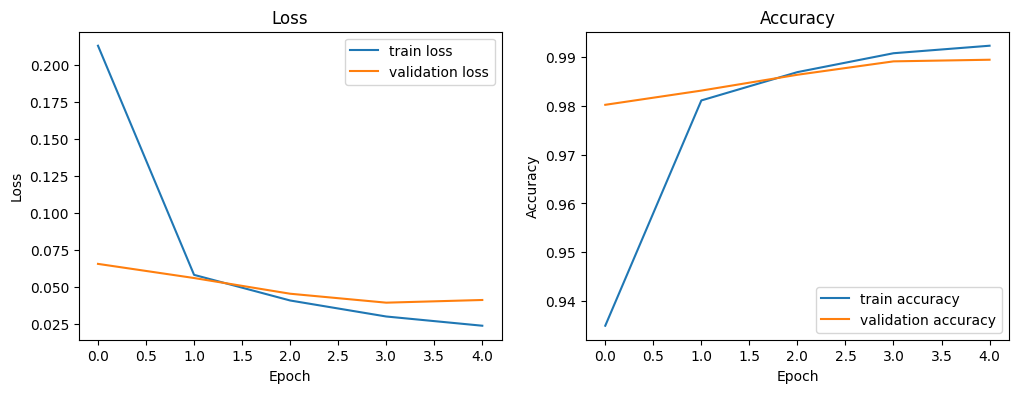

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


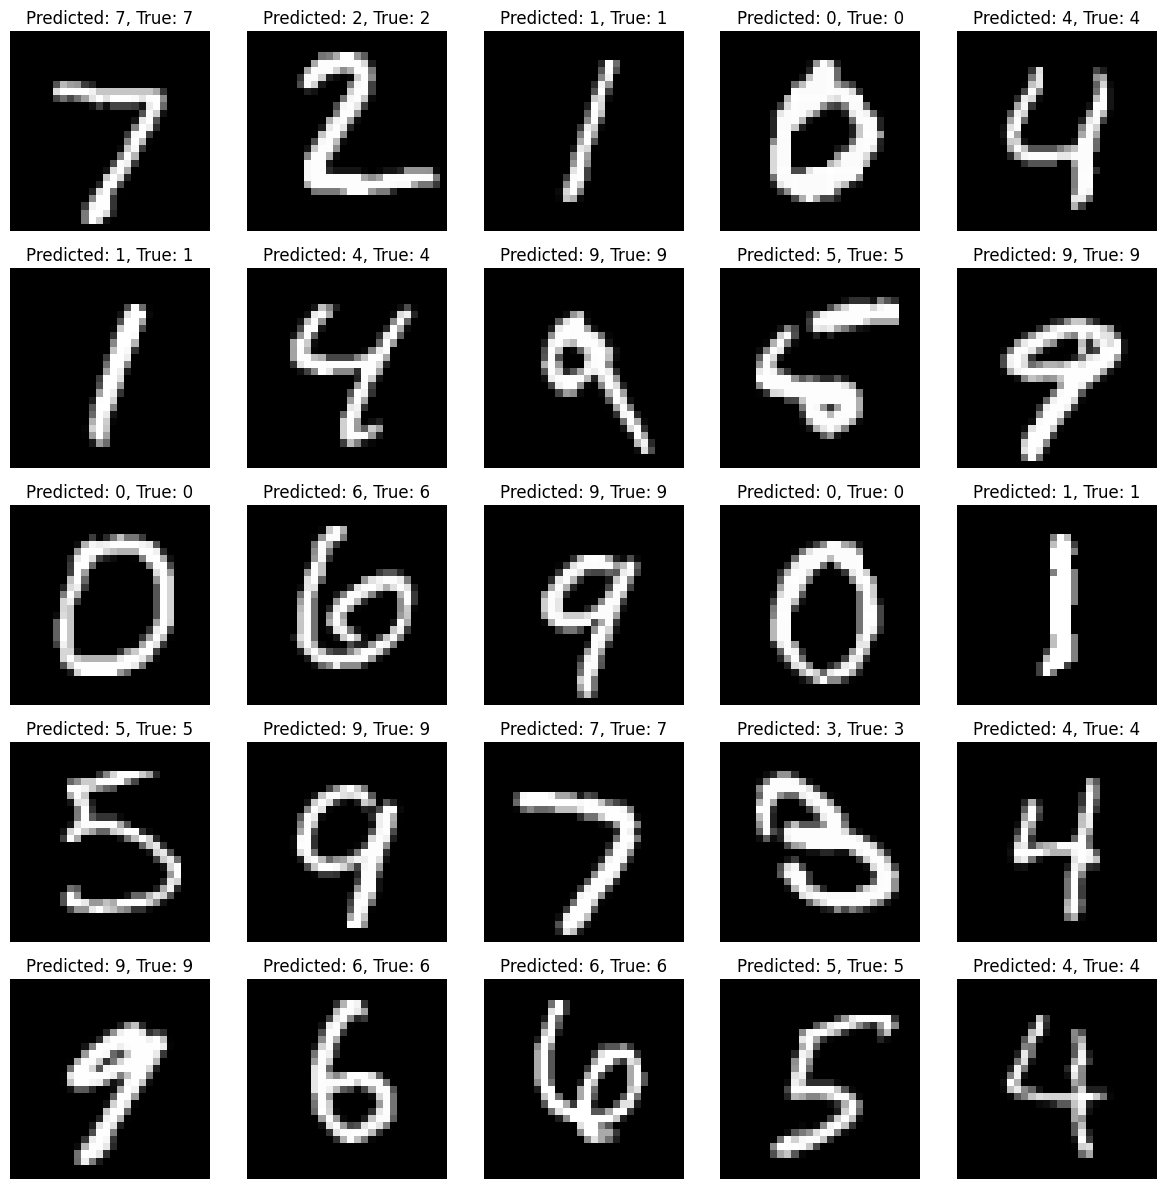

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Предобработка данных
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255  # Преобразование в форму (28, 28, 1)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)  # Преобразование меток в one-hot формат
y_test = to_categorical(y_test, 10)

# Определение модели CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))  # Первый сверточный слой
model.add(layers.MaxPooling2D((2, 2)))  # Слой подвыборки
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Второй сверточный слой
model.add(layers.MaxPooling2D((2, 2)))  # Слой подвыборки
model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # Третий сверточный слой
model.add(layers.Flatten())  # Преобразование в вектор
model.add(layers.Dense(64, activation='relu'))  # Полносвязный слой
model.add(layers.Dense(10, activation='softmax'))  # Выходной слой

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Оценка модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Визуализация потерь и точности
plt.figure(figsize=(12, 4))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Прогнозирование
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Визуализация некоторых предсказаний
plt.figure(figsize=(12, 12))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}, True: {np.argmax(y_test[i])}')
    plt.axis('off')

plt.tight_layout()
plt.show()




### Вопросы для самопроверки

1. Что такое сверточная нейронная сеть (CNN)?
2. Какая основная идея сверточных слоев в CNN?
3. Что такое ядро свертки (фильтр), и какова его роль в CNN?
4. Объясните, что такое операция подвыборки (пулинг). Каковы ее преимущества?
5. Какова функция активации ReLU и почему она так популярна в нейронных сетях?
6. Что такое функция потерь, и какие функции потерь часто используются в CNN для задач классификации?
7. Какова роль функции активации на выходном слое сети?
8. Что такое обратное распространение ошибки (backpropagation) и как оно работает?
9. Объясните, что такое переобучение (overfitting) и как его можно предотвратить в CNN.
10. Какой эффект имеет нормализация данных на обучение модели?
11. В чем разница между полносвязными слоями и сверточными слоями?
12. Как работают слои Batch Normalization?
13. Что такое dropout, и как он помогает в обучении нейронных сетей?
14. Как вы можете улучшить производительность CNN? Приведите несколько методов.
15. Почему важно использовать данные для валидации при обучении нейронной сети?

###Задачи для самостоятельной работы

1. Свертка:
   - Дано изображение 5x5 и фильтр 3x3. Найдите свертку изображения с фильтром, если:
     - Изображение:
    $$
       \begin{bmatrix}
       1 & 2 & 3 & 0 & 1 \\
       0 & 1 & 2 & 4 & 0 \\
       1 & 0 & 1 & 2 & 1 \\
       2 & 1 & 0 & 1 & 0 \\
       1 & 2 & 1 & 0 & 2
       \end{bmatrix}
    $$
     - Фильтр:
    $$
       \begin{bmatrix}
       1 & 0 & -1 \\
       1 & 0 & -1 \\
       1 & 0 & -1
       \end{bmatrix}
    $$

2. Пулинг:
   - Найдите максимальное значение в области 2x2 следующего матрицы:
  $$
     \begin{bmatrix}
     1 & 3 & 2 & 4 \\
     2 & 1 & 3 & 0 \\
     0 & 2 & 1 & 4 \\
     3 & 1 & 2 & 1
     \end{bmatrix}
  $$

3. Активация:
   - Примените функцию активации ReLU к вектору:
  $$
     \begin{bmatrix}
     -2 \\
     0 \\
     3 \\
     -1 \\
     4
     \end{bmatrix}
  $$

4. Оценка производительности:
   - У вас есть 1000 изображений, из которых 800 правильно классифицированы. Какова точность модели?

5. Функция потерь:
   - Рассчитайте бинарную кросс-энтропию, если y = 1 и p = 0.8.

6. Обратное распространение:
   - Если выходная ошибка составляет 0.5, а производная функции активации ReLU равна 1, какова будет ошибка на предыдущем слое?

7. Параметры сети:
   - Рассчитайте общее количество параметров в следующем слое:
     - Полносвязный слой с 128 нейронами, принимающий вход размером 64.

8. Свертка:
   - Найдите размер выходного изображения после свертки 5x5 с фильтром 3x3 без дополнения (padding) и шагом (stride) 1.

9. Dropout:
   - Если в слое dropout с вероятностью 0.5 активны 10 нейронов, сколько нейронов было в слое до применения dropout?

10. Batch Normalization:
    - Объясните, как происходит нормализация входных данных в слое Batch Normalization.

11. Конвертация форматов:
    - Преобразуйте метки классов (0, 1, 2) в формат one-hot для трех классов.

12. Обратное распространение:
    - Рассчитайте градиент потерь по отношению к выходу, если выходное значение = 0.6 и истинное значение = 1.

13. Обучение:
    - У вас есть 5000 изображений для обучения и 1000 для тестирования. Если вы решили использовать 20% для валидации, сколько изображений у вас останется для обучения?

14. Активация:
    - Примените сигмоидную функцию к следующему вектору:
   $$
      \begin{bmatrix}
      -1 \\
      0 \\
      1 \\
      2
      \end{bmatrix}
   $$

15. Свертка:
    - Для изображения размером 28x28 и фильтра 3x3, определите размер выходного изображения, если применяется padding = 1.

16. Сумма значений:
    - Какова сумма всех значений в следующей матрице 3x3:
   $$
      \begin{bmatrix}
      1 & 2 & 3 \\
      4 & 5 & 6 \\
      7 & 8 & 9
      \end{bmatrix}
   $$

17. Максимальная пулинг:
    - Примените слой максимальной подвыборки (2x2) к следующей матрице:
   $$
      \begin{bmatrix}
      1 & 3 & 2 & 4 \\
      2 & 1 & 3 & 0 \\
      0 & 2 & 1 & 4 \\
      3 & 1 & 2 & 1
      \end{bmatrix}
   $$

18. Свертка:
    - Если у вас есть 6x6 изображение и 2x2 фильтр, каков размер выходного изображения после свертки с шагом 2?

19. Функция потерь:
    - Рассчитайте категориальную кросс-энтропию для следующих значений:
      - Истинное значение: [0, 1, 0]
      - Предсказанные значения: [0.1, 0.8, 0.1]

20. Активация:
    - Объясните, как работает функция активации tanh и приведите пример ее графика.

21. Обратное распространение:
    - Если вес нейрона равен 0.5, и входное значение равно 2, какова будет ошибка нейрона, если градиент потерь равен 0.4?

22. Обучение:
    - Если вы обучаете модель на 5000 примерах и используете 256 в качестве размера батча, сколько итераций потребуется для одного эпохи?

23. Свертка:
    - Рассчитайте общее количество параметров в сверточном слое, если он имеет 64 фильтра 3x3 и принимает вход размером 32x32x3.

24. Параметры модели:
    - Каково общее количество параметров в полносвязном слое с 100 нейронами, если на вход подается вектор размером 50?

25. Dropout:
    - Какой эффект на нейронную сеть будет иметь dropout с вероятностью 0.5 на выходной слой, состоящий из 20 нейронов?

26. Параметры модели:
    - Рассчитайте количество параметров в следующем сверточном слое: 128 фильтров 5x5, принимающий вход размером 32x32x3.

27. Активация:
    - Объясните, что произойдет, если мы применим функцию активации softmax к вектору [2, 1, 0].

28. Обратное распространение:
    - Рассчитайте обновление веса, если:
      - Градиент весов = 0.1
      - Скорость обучения = 0.01

29. Свертка:
    - Для изображения 32x32 и фильтра 5x5, какое значение будет иметь размер выходного изображения при использовании стрида 1 и без паддинга?

30. Валидация:
    - Объясните, почему использование валидационной выборки важно в процессе обучения модели.


